### Import required packages

In [5]:
import matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import matplotlib as mpl
from matplotlib import cm
import colorsys
from itertools import count
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)


### Read database information

In [6]:
df = pd.read_excel('Database.xlsx', index_col=0) 

In [7]:
df

,node,CA,DE(kcal/mol),adduct,R1,R2,backbone,Interaction
0,Br-CNC-pincer-cy-CF3-2,6,8.32,Br,cy,CF3,CNC,"""+Mn-Br, +Mn-F """
1,Br-CNC-pincer-iPr-CF3-2,5,16.89,Br,iPr,CF3,CNC,"""-Mn-C, -N-H, +C-H """
2,Br-CNC-pincer-iPr-CF3-3,6,18.04,Br,iPr,CF3,CNC,"""-Mn-C, -N-H, +C-H, +Mn-F """
3,Br-CNC-pincer-tBut-CF3-2,6,6.70,Br,tBu,CF3,CNC,"""+Mn-Br, +Mn-F """
4,Br-CNC-pincer-tBut-CF3-3,6,6.11,Br,tBu,CF3,CNC,"""-Mn-C, -N-H, +C-H, +Mn-F """
5,Br-CNC-pincer-tBut-CF3-4,5,7.44,Br,tBu,CF3,CNC,"""-Mn-C, -N-H, +C-H """
6,Br-CNC-pincer-tBut-cy-2,5,-43.77,Br,tBu,cy,CNC,"""-Mn-N """
7,Br-CNC-pincer-tBut-cy-3,4,-2.93,Br,tBu,cy,CNC,"""-Mn-N, -Mn-C, +C-C """
8,Br-CNC-pincer-tBut-iPr-2,5,1.85,Br,tBu,iPr,CNC,"""+Mn-Br """
9,Br-CNC-pincer-tBut-iPr-3,5,20.53,Br,tBu,iPr,CNC,"""-Mn-C, +C-C """


### Correlation Plots 

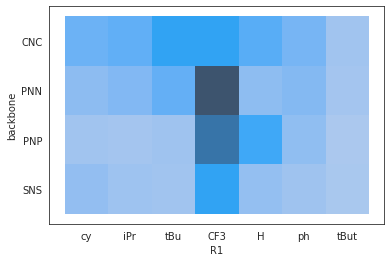

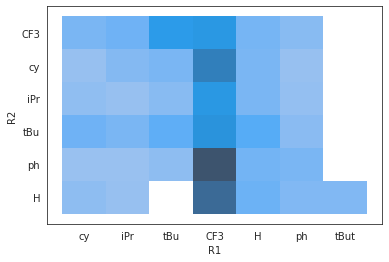

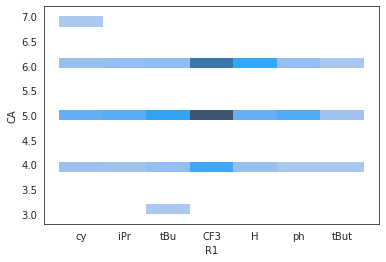

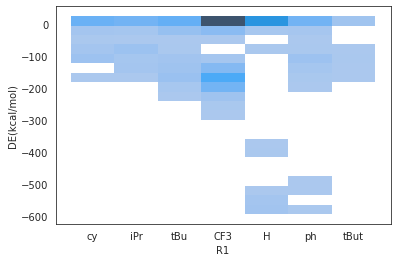

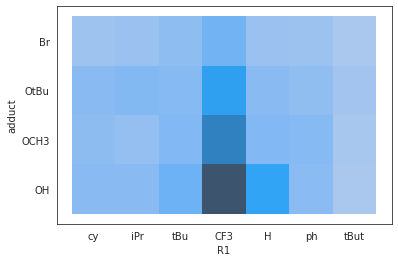

In [32]:
Features = ['backbone', 'R2', 'CA', 'DE(kcal/mol)', 'adduct']
for j in Features:
    with sns.axes_style("white"):
        plt.figure()
        g = sns.histplot(x="R1", y=j, data=df)

## Catplots

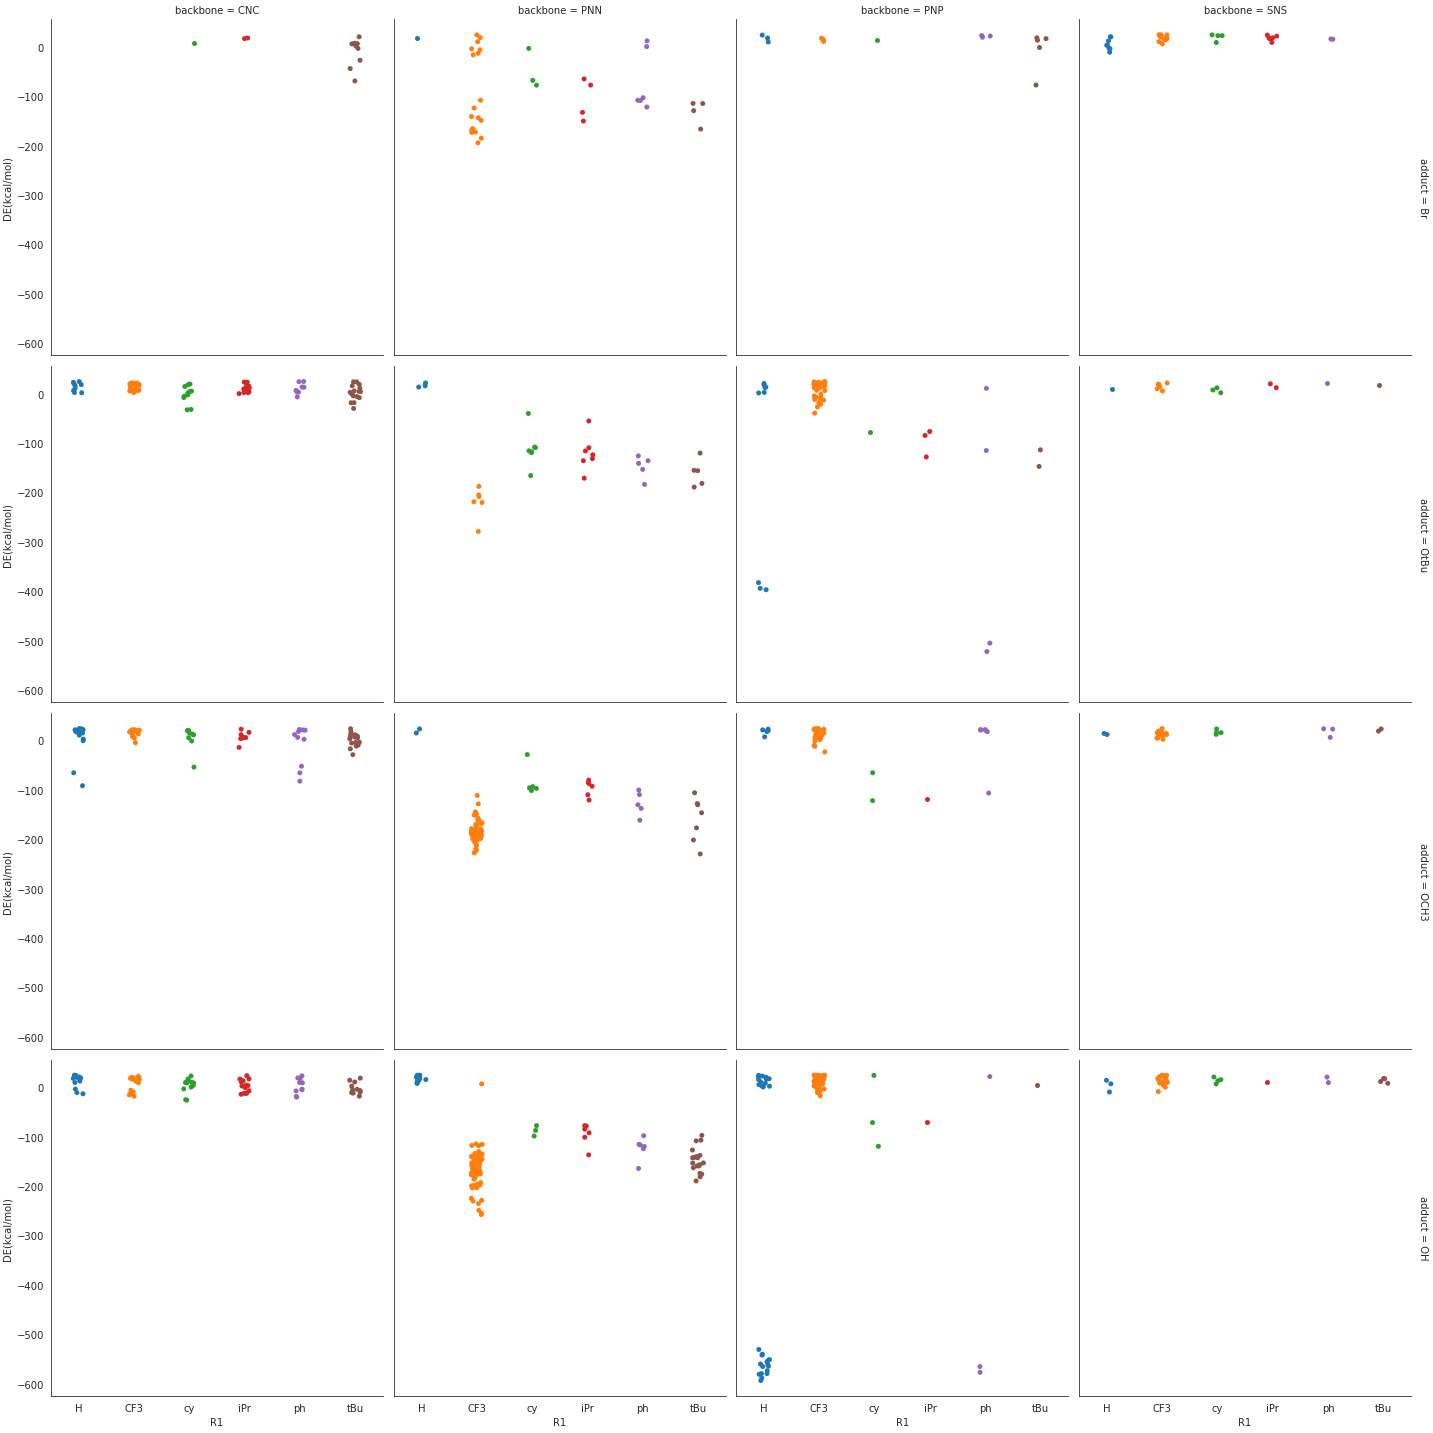

<Figure size 432x288 with 0 Axes>

In [5]:
with sns.axes_style("white"):
    g = sns.catplot(x="R1", y="DE(kcal/mol)", col='backbone', row='adduct', legend=True, order=['H', 'CF3',  'cy',  'iPr',  'ph',  'tBu'], data=df , margin_titles=True, hue_order=['Br', 'OH', 'OCH3', 'OtBu']) #hue_order=['Intact', 'Labile'] hue="Side-arm-lability", hue_order=['Intact', '-Mn-N set', '-Mn-C,', '-Mn-C(2),', '-Mn-P,', '-Mn-S,', '-Mn-S(2),']
    plt.figure()


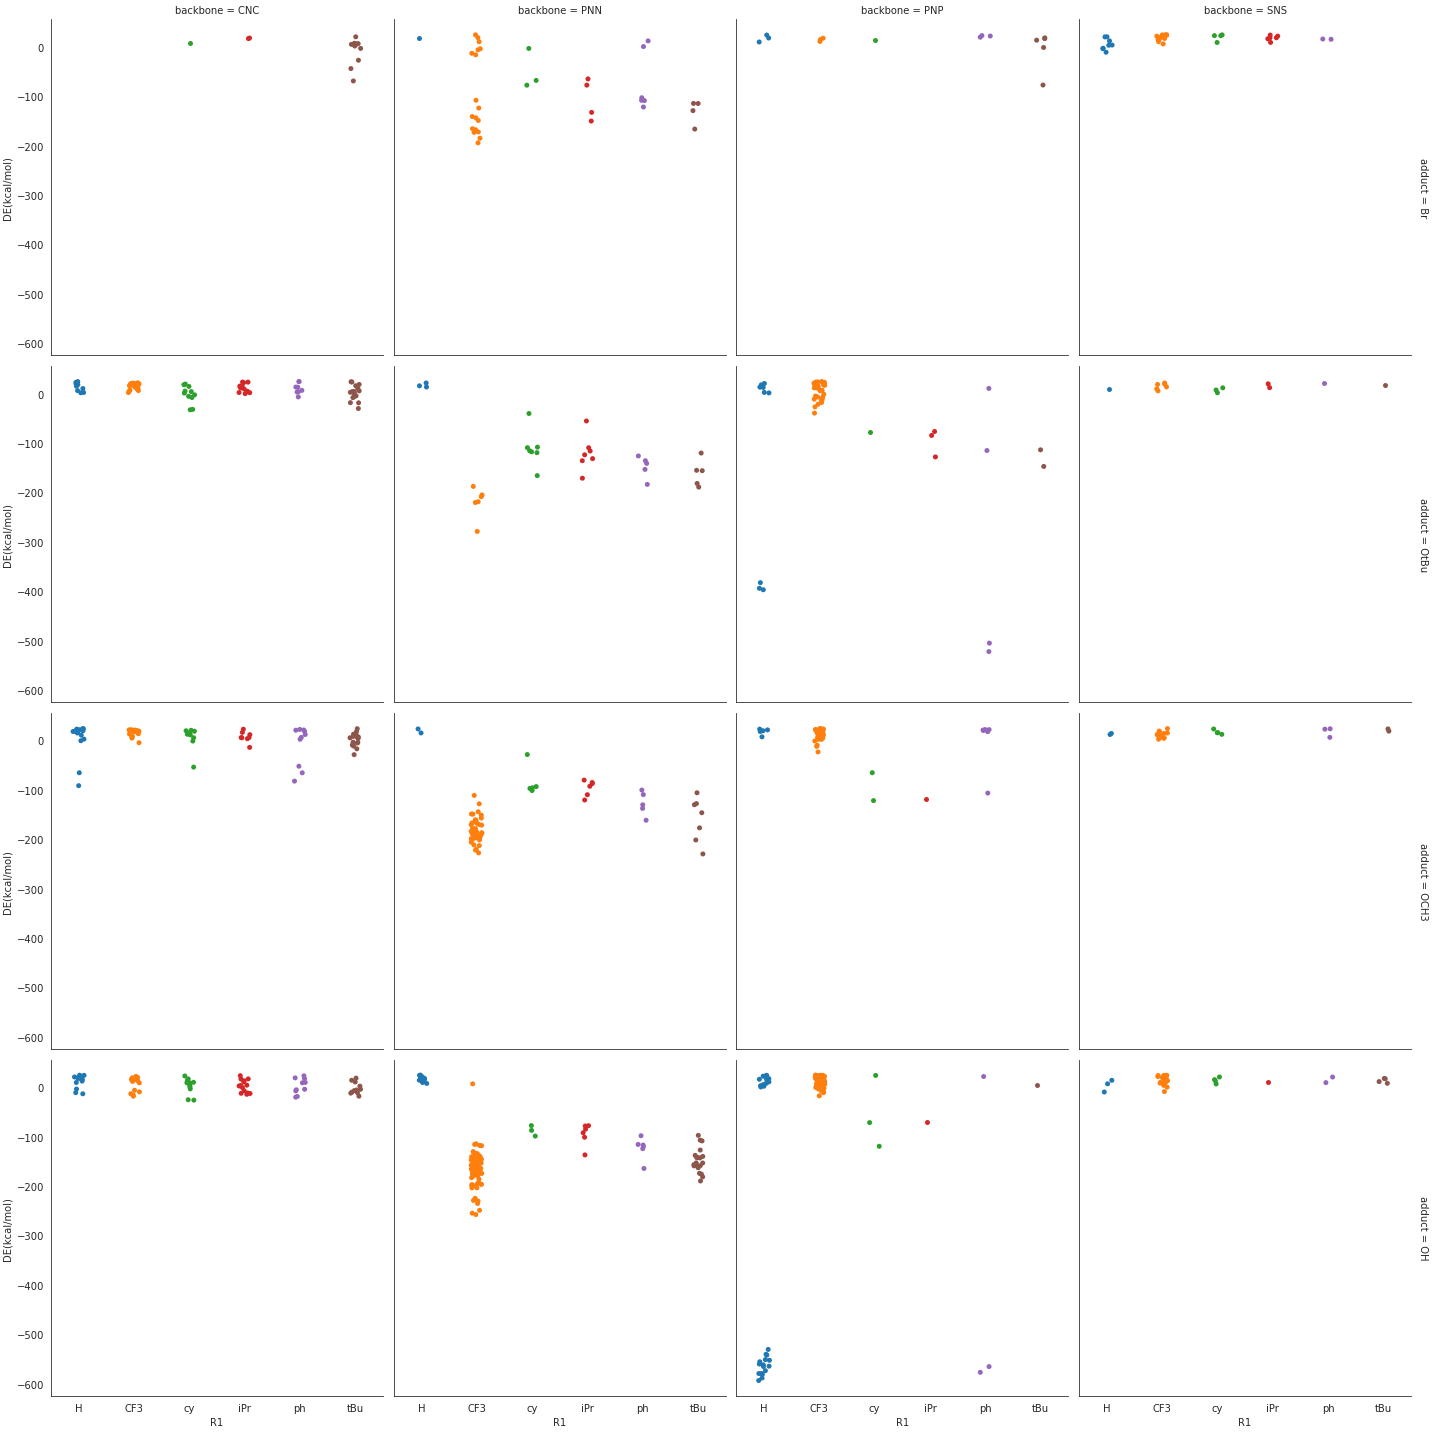

<Figure size 432x288 with 0 Axes>

In [6]:
#Features = ['backbone', 'R2', 'CA', 'DE(kcal/mol)', 'adduct']
#for j in Features:
with sns.axes_style("white"):
    #g = sns.catplot(x="ligand2", y="ΔE (kcal/mol)", hue="adduct", col="backbone", col_wrap=2, data=df_C_O_le0, order=['iPr-cy', 'tBut-cy',  'cy-iPr',  'iPr-iPr',  'ph-iPr',  'tBut-iPr',  'CF3-tBut',  'cy-tBut',  'iPr-tBut',  'ph-tBut',  'tBut-tBut',  'tBut'], margin_titles=True)
    #g = sns.catplot(x="R1", y="ΔE(kcal/mol)", col='backbone', row='R2', row_order=['CF3', 'cy', 'iPr', 'ph', 'tBut', '-'],  hue='Side-arm-lability' , order=['H', 'CF3',  'cy',  'iPr',  'ph',  'tBut'], height=4, data=df2, margin_titles=True) #hue_order=['Intact', 'Labile'] hue="Side-arm-lability", hue_order=['Intact', '-Mn-N set', '-Mn-C,', '-Mn-C(2),', '-Mn-P,', '-Mn-S,', '-Mn-S(2),']
    g = sns.catplot(x="R1", y="DE(kcal/mol)", col='backbone', row='adduct',  order=['H', 'CF3',  'cy',  'iPr',  'ph',  'tBu'], data=df , margin_titles=True) #hue_order=['Intact', 'Labile'] hue="Side-arm-lability", hue_order=['Intact', '-Mn-N set', '-Mn-C,', '-Mn-C(2),', '-Mn-P,', '-Mn-S,', '-Mn-S(2),']
    plt.figure()
    #g = sns.histplot(x="R1", y=j, data=df)#, order =['tBu', 'cy', 'ph', 'CF3', 'H', 'iPr'] , margin_titles=True) #, order=['Br', 'OH',  'OCH3',  'OtBu'] hue_order=['Intact', 'Labile'] hue="Side-arm-lability", hue_order=['Intact', '-Mn-N set', '-Mn-C,', '-Mn-C(2),', '-Mn-P,', '-Mn-S,', '-Mn-S(2),']
    #g = sns.catplot(x="R1", y="ΔE(kcal/mol)", col='backbone', col_wrap=2, hue="Cluster Centers", order=['H', 'CF3',  'cy',  'iPr',  'ph',  'tBut'], height=4, data=df_le25nonredundant2, margin_titles=True)
    #hue_order=['Intact', '-Mn-N, ', '-Mn-C, ', '-Mn-P, ', '-Mn-S, ', '-Mn-N, -Mn-C, ', '-Mn-N(2), ', '-Mn-N(2), -Mn-P, ', '-Mn-N, -Mn-P, ', '-Mn-N, -Mn-S(2), ']

    #order=['CF3', 'CF3-CF3',  'CF3-cy',  'CF3-iPr',  'CF3-ph',  'CF3-tBut', 'H', 'H-CF3',  'H-cy',  'H-iPr']
    #order=['H', 'CF3',  'cy',  'iPr',  'ph',  'tBut']

    #,height=8.27, aspect=11.7/8.27, order=['CF3-CF3',  'CF3-cy',  'CF3-iPr',  'CF3-ph',  'CF3-tBut',  'CF3',  'cy-CF3',  'cy-cy',  'cy-iPr',  'cy-ph',  'cy-tBut',  'cy',  'H-CF3',  'H-cy',  'H-iPr',  'H-ph',  'H-tBut',  'H',  'iPr-CF3',  'iPr-cy',  'iPr-iPr',  'iPr-ph',  'iPr-tBut',  'iPr',  'ph-CF3',  'ph-cy',  'ph-iPr',  'ph-ph',  'ph-tBut',  'ph',  'tBut-CF3',  'tBut-cy',  'tBut-iPr',  'tBut-ph',  'tBut-tBut',  'tBut'] ,
    #sns.set(font_scale = 1.2)
    #g.set_xticklabels(rotation=90)
    #g.set_axis_labels("R1","ΔE (kcal/mol)")
    #for ax in g.axes:
        #ax.set_xticklabels(['A', 'B', 'C'], rotation=0)
       #ax.tick_params(labelbottom=True)
        #plt.subplots_adjust(bottom=0.1, left=0.06, hspace=0.2)
#y="ΔE (kcal/mol)"

### Elbow curve to find optimal K

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 675.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 649.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 673.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, i

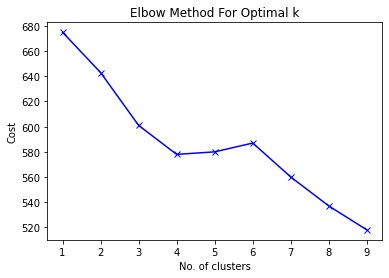

In [20]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(newdata)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Kmode Clustering

In [21]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
#data = df2[['adduct', 'ligand2', 'U_interaction']]
#newdata = df2[['+N-P','-H-S','-P-C','+H-C','-P-H','+C-C','+O-C','-C-O','+C-O','+Mn-H','-O-H','-C-P','-C-H','+F-C','+H-O','+C-H','+C-P','+P-H','-Mn-C','+P-C','+F-F','+Mn-C','-Mn-S','-N-H','+N-H','+P-P','-C-C','+Mn-F','+N-C','+C-F','+F-O','-C-F','+H-H','+H-P','+P-O','-N-C','-Mn-N','+O-P','-P-O','+Mn-O','+O-H','-Mn-P']]
newdata = df[['Interaction']]
km = KModes(n_clusters=7, init='Huang', n_init=5, verbose=0)

clusters2 = km.fit_predict(newdata)

#plt.scatter(df2.relengMin, df2.ligand2, c=vectorizer(clusters2))

# Print the cluster centroids
print(km.cluster_centroids_)

[['"-Mn-N "']
 ['"+Mn-F, -P-C, +P-O, -C-F "']
 ['"-Mn-N, -P-C, +P-O, +Mn-F, +Mn-F "']
 ['"-Mn-N, -Mn-P "']
 ['"-Mn-N, +Mn-C, -P-C, +P-O "']
 ['"-Mn-N, +Mn-C, -P-C, +P-O, +Mn-F "']
 ['"-Mn-N, -Mn-P, +Mn-C, -P-C, +P-O, +Mn-F "']]
